In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.4f}'.format
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import scanpy as sc
import anndata as ad

In [3]:
adata=sc.read_h5ad('K562_essential_normalized_bulk_01.h5ad')

In [4]:
adata.obs

UMI_count_unfiltered  \
gene_transcript                                            
10023_ZC3H18_P1P2_ENSG00000158545             14663.5449   
10029_ZC3H8_P1P2_ENSG00000144161              13993.9512   
10040_ZCCHC9_P1P2_ENSG00000131732             12458.1084   
10041_ZCRB1_P1P2_ENSG00000139168              13984.8789   
1004_C17orf58_P1P2_ENSG00000186665            13321.5166   
...                                                  ...   
9946_YTHDC1_P1P2_ENSG00000083896              10837.2822   
9958_YY1_P1P2_ENSG00000100811                 13071.0000   
9969_ZBTB11_P1P2_ENSG00000066422              14092.8604   
9975_ZBTB17_P1P2_ENSG00000116809              12124.8955   
997_C16orf86_P1P2_ENSG00000159761             14110.4844   

                                    num_cells_unfiltered  num_cells_filtered  \
gene_transcript                                                                
10023_ZC3H18_P1P2_ENSG00000158545                     33             32.0000   
10029_ZC3H8_P1P2_ENSG00000144161                      21             21.0000   
10040_ZCCHC9_P1P2_ENSG00000131732                     55             54.0000   
10041_ZCRB1_P1P2_ENSG00000139168                     149            146.0000   
1004_C17orf58_P1P2_ENSG00000186665                    60             58.0000   
...                                                  ...                 ...   
9946_YTHDC1_P1P2_ENSG00000083896                     297            237.0000   
9958_YY1_P1P2_ENSG00000100811                         86             82.0000   
9969_ZBTB11_P1P2_ENSG00000066422                     150            146.0000   
9975_ZBTB17_P1P2_ENSG00000116809                     172            160.0000   
997_C16orf86_P1P2_ENSG00000159761                    188            184.0000   

                                    control_expr  fold_expr  pct_expr  \
gene_transcript                                                         
10023_ZC3H18_P1P2_ENSG00000158545         1.3644     0.2350   -0.7650   
10029_ZC3H8_P1P2_ENSG00000144161          0.6112     0.0000   -1.0000   
10040_ZCCHC9_P1P2_ENSG00000131732         0.6867     0.2328   -0.7672   
10041_ZCRB1_P1P2_ENSG00000139168          0.9249     0.0572   -0.9428   
1004_C17orf58_P1P2_ENSG00000186665        0.7135     0.1687   -0.8313   
...                                          ...        ...       ...   
9946_YTHDC1_P1P2_ENSG00000083896          1.1001     0.5249   -0.4751   
9958_YY1_P1P2_ENSG00000100811             1.7877     0.7421   -0.2579   
9969_ZBTB11_P1P2_ENSG00000066422          0.8230     0.3577   -0.6423   
9975_ZBTB17_P1P2_ENSG00000116809          0.1380     0.1448   -0.8552   
997_C16orf86_P1P2_ENSG00000159761         0.0169     0.0000   -1.0000   

                                    core_control  mean_leverage_score  \
gene_transcript                                                         
10023_ZC3H18_P1P2_ENSG00000158545          False               0.4573   
10029_ZC3H8_P1P2_ENSG00000144161           False               0.5870   
10040_ZCCHC9_P1P2_ENSG00000131732          False               1.1207   
10041_ZCRB1_P1P2_ENSG00000139168           False               0.2681   
1004_C17orf58_P1P2_ENSG00000186665         False               0.3370   
...                                          ...                  ...   
9946_YTHDC1_P1P2_ENSG00000083896           False               0.7753   
9958_YY1_P1P2_ENSG00000100811              False               0.3453   
9969_ZBTB11_P1P2_ENSG00000066422           False               0.2928   
9975_ZBTB17_P1P2_ENSG00000116809           False               0.5942   
997_C16orf86_P1P2_ENSG00000159761          False               0.2675   

                                    std_leverage_score  energy_test_p_value  \
gene_transcript                                                               
10023_ZC3H18_P1P2_ENSG00000158545               0.8274               0.0002   
10029_ZC3H8_P1P2_ENSG00000144161                0.8408               0.0002  

In [5]:
adata.var

gene_name   mean    std     cv  in_matrix   gini  \
gene_id                                                              
ENSG00000237491   LINC01409 0.1300 0.0437 0.3364       True 0.1798   
ENSG00000228794   LINC01128 0.2433 0.0645 0.2651       True 0.1422   
ENSG00000188976       NOC2L 1.8871 0.3279 0.1738       True 0.0945   
ENSG00000187961      KLHL17 0.1145 0.0431 0.3760       True 0.1961   
ENSG00000188290        HES4 0.2377 0.0841 0.3540       True 0.1829   
...                     ...    ...    ...    ...        ...    ...   
ENSG00000278704  BX004987.1 0.2279 0.0582 0.2554       True 0.1393   
ENSG00000274847       MAFIP 0.1217 0.0430 0.3531       True 0.1864   
ENSG00000278384  AL354822.1 0.2333 0.0573 0.2454       True 0.1342   
ENSG00000271254  AC240274.1 0.2138 0.0680 0.3183       True 0.1741   
ENSG00000276345  AC004556.3 0.3263 0.0836 0.2561       True 0.1405   

                 clean_mean  clean_std  clean_cv  
gene_id                                           
ENSG00000237491      0.1374     0.0460    0.3352  
ENSG00000228794      0.2591     0.0677    0.2612  
ENSG00000188976      2.0055     0.3269    0.1630  
ENSG00000187961      0.1209     0.0440    0.3638  
ENSG00000188290      0.2512     0.0881    0.3508  
...                     ...        ...       ...  
ENSG00000278704      0.2410     0.0609    0.2527  
ENSG00000274847      0.1282     0.0448    0.3495  
ENSG00000278384      0.2468     0.0610    0.2471  
ENSG00000271254      0.2280     0.0705    0.3092  
ENSG00000276345      0.3486     0.0854    0.2449  

[8563 rows x 9 columns]

In [7]:
print("=== 数据索引分析 ===")
print("索引示例:", adata.obs.index[:5].tolist())
print("索引名称:", adata.obs.index.name)

# 从索引中提取基因名
def extract_gene_name_from_index(index_str):
    """从索引字符串中提取基因名"""
    # 格式: '10023_ZC3H18_P1P2_ENSG00000158545'
    parts = index_str.split('_')
    if len(parts) >= 2:
        return parts[1]  # 基因名是第二部分
    else:
        return index_str

# 创建基因名列
adata.obs['gene_target'] = [extract_gene_name_from_index(idx) for idx in adata.obs.index]

# 检查提取结果
print("\n=== 提取的基因名示例 ===")
print(adata.obs[['gene_target']].head())

# 检查是否有对照组
print("\n=== 寻找对照组 ===")
# 查看是否有control相关的行
control_keywords = ['control', 'CTRL', 'neg', 'NTC', 'non-targeting']
control_mask = adata.obs['gene_target'].str.contains('|'.join(control_keywords), case=False, na=False)
print(f"可能的对照组数量: {control_mask.sum()}")
if control_mask.sum() > 0:
    print("对照组基因名示例:")
    print(adata.obs.loc[control_mask, 'gene_target'].head())
else:
    print("未找到明显的对照组，可能需要手动识别或使用所有样本作为背景")

=== 数据索引分析 ===
索引示例: ['10023_ZC3H18_P1P2_ENSG00000158545', '10029_ZC3H8_P1P2_ENSG00000144161', '10040_ZCCHC9_P1P2_ENSG00000131732', '10041_ZCRB1_P1P2_ENSG00000139168', '1004_C17orf58_P1P2_ENSG00000186665']
索引名称: gene_transcript

=== 提取的基因名示例 ===
                                   gene_target
gene_transcript                               
10023_ZC3H18_P1P2_ENSG00000158545       ZC3H18
10029_ZC3H8_P1P2_ENSG00000144161         ZC3H8
10040_ZCCHC9_P1P2_ENSG00000131732       ZCCHC9
10041_ZCRB1_P1P2_ENSG00000139168         ZCRB1
1004_C17orf58_P1P2_ENSG00000186665    C17orf58

=== 寻找对照组 ===
可能的对照组数量: 109
对照组基因名示例:
gene_transcript
10753_non-targeting_non-targeting_non-targeting    non-targeting
10759_non-targeting_non-targeting_non-targeting    non-targeting
10760_non-targeting_non-targeting_non-targeting    non-targeting
10772_non-targeting_non-targeting_non-targeting    non-targeting
10782_non-targeting_non-targeting_non-targeting    non-targeting
Name: gene_target, dtype: object


=== 分析现有统计列 ===
                              mean       std       min        max  missing
UMI_count_unfiltered    13178.0995 1546.3393 5120.6514 18116.4004        0
num_cells_unfiltered      148.9654  114.5522         5       2143        0
num_cells_filtered        136.5530  103.0579    5.0000  1996.0000       12
control_expr                3.2221    9.0945    0.0000   118.7318      109
fold_expr                   0.2488    0.3493    0.0000    12.0851      151
pct_expr                   -0.7512    0.3493   -1.0000    11.0851      151
core_control                0.0425    0.2017     False       True        0
mean_leverage_score         0.6215    0.4878   -0.3190     3.5185        0
std_leverage_score          0.9780    0.1845    0.5129     2.0775        0
energy_test_p_value         0.0871    0.1902    0.0001     0.9949        0
anderson_darling_counts   604.4950 1197.4680         0       6036        0
mann_whitney_counts       443.9427  836.7385         0       5194        0
z_gemgrou

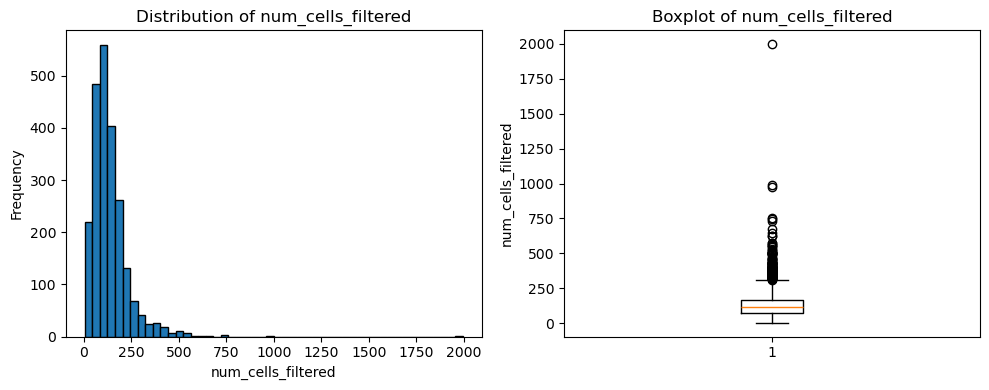


anderson_darling_counts:
  非空值: 2285
  中位数: 46.00
  平均值: 604.49


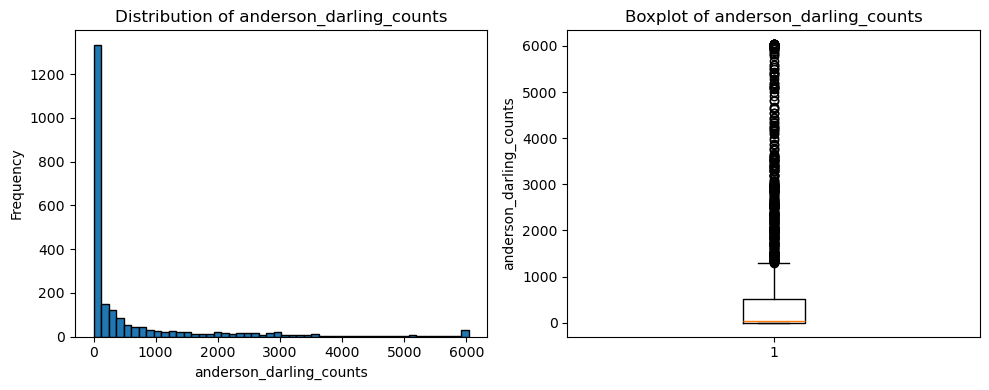


energy_test_p_value:
  非空值: 2285
  中位数: 0.00
  平均值: 0.09


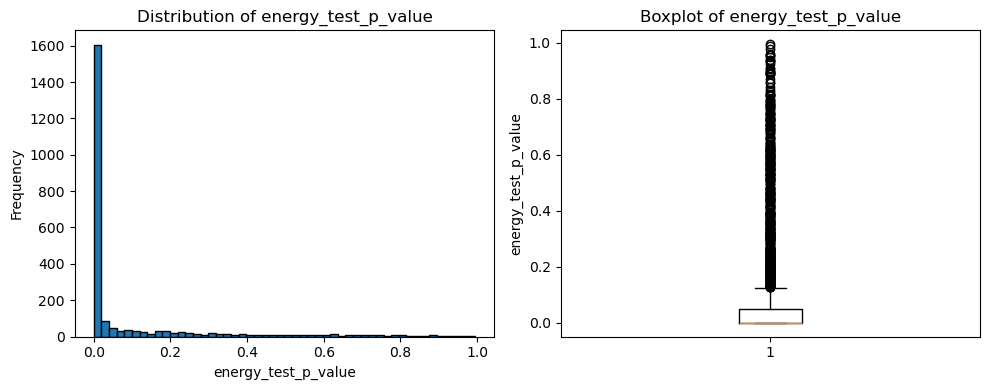

In [8]:
print("=== 分析现有统计列 ===")

# 查看各统计列的基本信息
stats_columns = [
    'UMI_count_unfiltered', 'num_cells_unfiltered', 'num_cells_filtered',
    'control_expr', 'fold_expr', 'pct_expr', 'core_control',
    'mean_leverage_score', 'std_leverage_score', 'energy_test_p_value',
    'anderson_darling_counts', 'mann_whitney_counts',
    'z_gemgroup_UMI', 'mitopercent', 'TE_ratio', 'cnv_score_z'
]

# 创建统计摘要
stats_summary = pd.DataFrame({
    'mean': adata.obs[stats_columns].mean(),
    'std': adata.obs[stats_columns].std(),
    'min': adata.obs[stats_columns].min(),
    'max': adata.obs[stats_columns].max(),
    'missing': adata.obs[stats_columns].isna().sum()
})
print(stats_summary)

# 特别关注关键列
print("\n=== 关键统计量分布 ===")
key_columns = ['num_cells_filtered', 'anderson_darling_counts', 'energy_test_p_value']
for col in key_columns:
    if col in adata.obs.columns:
        print(f"\n{col}:")
        print(f"  非空值: {adata.obs[col].notna().sum()}")
        print(f"  中位数: {adata.obs[col].median():.2f}")
        print(f"  平均值: {adata.obs[col].mean():.2f}")
        
        # 绘制分布
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))
        
        # 直方图
        axes[0].hist(adata.obs[col].dropna(), bins=50, edgecolor='black')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Frequency')
        axes[0].set_title(f'Distribution of {col}')
        
        # 箱线图
        axes[1].boxplot(adata.obs[col].dropna())
        axes[1].set_ylabel(col)
        axes[1].set_title(f'Boxplot of {col}')
        
        plt.tight_layout()
        plt.show()

In [11]:
adata.obs

UMI_count_unfiltered  \
gene_transcript                                            
10023_ZC3H18_P1P2_ENSG00000158545             14663.5449   
10029_ZC3H8_P1P2_ENSG00000144161              13993.9512   
10040_ZCCHC9_P1P2_ENSG00000131732             12458.1084   
10041_ZCRB1_P1P2_ENSG00000139168              13984.8789   
1004_C17orf58_P1P2_ENSG00000186665            13321.5166   
...                                                  ...   
9946_YTHDC1_P1P2_ENSG00000083896              10837.2822   
9958_YY1_P1P2_ENSG00000100811                 13071.0000   
9969_ZBTB11_P1P2_ENSG00000066422              14092.8604   
9975_ZBTB17_P1P2_ENSG00000116809              12124.8955   
997_C16orf86_P1P2_ENSG00000159761             14110.4844   

                                    num_cells_unfiltered  num_cells_filtered  \
gene_transcript                                                                
10023_ZC3H18_P1P2_ENSG00000158545                     33             32.0000   
10029_ZC3H8_P1P2_ENSG00000144161                      21             21.0000   
10040_ZCCHC9_P1P2_ENSG00000131732                     55             54.0000   
10041_ZCRB1_P1P2_ENSG00000139168                     149            146.0000   
1004_C17orf58_P1P2_ENSG00000186665                    60             58.0000   
...                                                  ...                 ...   
9946_YTHDC1_P1P2_ENSG00000083896                     297            237.0000   
9958_YY1_P1P2_ENSG00000100811                         86             82.0000   
9969_ZBTB11_P1P2_ENSG00000066422                     150            146.0000   
9975_ZBTB17_P1P2_ENSG00000116809                     172            160.0000   
997_C16orf86_P1P2_ENSG00000159761                    188            184.0000   

                                    control_expr  fold_expr  pct_expr  \
gene_transcript                                                         
10023_ZC3H18_P1P2_ENSG00000158545         1.3644     0.2350   -0.7650   
10029_ZC3H8_P1P2_ENSG00000144161          0.6112     0.0000   -1.0000   
10040_ZCCHC9_P1P2_ENSG00000131732         0.6867     0.2328   -0.7672   
10041_ZCRB1_P1P2_ENSG00000139168          0.9249     0.0572   -0.9428   
1004_C17orf58_P1P2_ENSG00000186665        0.7135     0.1687   -0.8313   
...                                          ...        ...       ...   
9946_YTHDC1_P1P2_ENSG00000083896          1.1001     0.5249   -0.4751   
9958_YY1_P1P2_ENSG00000100811             1.7877     0.7421   -0.2579   
9969_ZBTB11_P1P2_ENSG00000066422          0.8230     0.3577   -0.6423   
9975_ZBTB17_P1P2_ENSG00000116809          0.1380     0.1448   -0.8552   
997_C16orf86_P1P2_ENSG00000159761         0.0169     0.0000   -1.0000   

                                    core_control  mean_leverage_score  \
gene_transcript                                                         
10023_ZC3H18_P1P2_ENSG00000158545          False               0.4573   
10029_ZC3H8_P1P2_ENSG00000144161           False               0.5870   
10040_ZCCHC9_P1P2_ENSG00000131732          False               1.1207   
10041_ZCRB1_P1P2_ENSG00000139168           False               0.2681   
1004_C17orf58_P1P2_ENSG00000186665         False               0.3370   
...                                          ...                  ...   
9946_YTHDC1_P1P2_ENSG00000083896           False               0.7753   
9958_YY1_P1P2_ENSG00000100811              False               0.3453   
9969_ZBTB11_P1P2_ENSG00000066422           False               0.2928   
9975_ZBTB17_P1P2_ENSG00000116809           False               0.5942   
997_C16orf86_P1P2_ENSG00000159761          False               0.2675   

                                    std_leverage_score  energy_test_p_value  \
gene_transcript                                                               
10023_ZC3H18_P1P2_ENSG00000158545               0.8274               0.0002   
10029_ZC3H8_P1P2_ENSG00000144161                0.8408               0.0002  

In [13]:
print("=== 根据论文标准识别强扰动 ===")

# 论文标准：
# 1. 至少50个差异表达基因 (anderson_darling_counts >= 50)
# 2. 至少25个细胞 (num_cells_filtered >= 25)
# 3. 能量距离检验显著 (energy_test_p_value < 0.05)
# 4. 目标基因敲低至少30% (从fold_expr计算)


# 识别强扰动
def identify_strong_perturbations_complete(adata):
    """根据完整统计信息识别强扰动"""
    strong_mask = pd.Series(False, index=adata.obs.index)
    
    # 条件1: 至少50个差异表达基因
    if 'anderson_darling_counts' in adata.obs.columns:
        condition1 = adata.obs['anderson_darling_counts'] >= 50
        print(f"条件1满足(>=50 DEGs): {condition1.sum()}")
    else:
        print("警告: 缺少anderson_darling_counts列，跳过条件1")
        condition1 = pd.Series(True, index=adata.obs.index)
    
    # 条件2: 至少25个细胞
    if 'num_cells_filtered' in adata.obs.columns:
        condition2 = adata.obs['num_cells_filtered'] >= 25
        print(f"条件2满足(>=25 cells): {condition2.sum()}")
    else:
        print("警告: 缺少num_cells_filtered列，跳过条件2")
        condition2 = pd.Series(True, index=adata.obs.index)
    
    # 条件3: 能量距离检验显著(p < 0.05)
    if 'energy_test_p_value' in adata.obs.columns:
        condition3 = adata.obs['energy_test_p_value'] < 0.05
        print(f"条件3满足(p < 0.05): {condition3.sum()}")
    else:
        print("警告: 缺少energy_test_p_value列，跳过条件3")
        condition3 = pd.Series(True, index=adata.obs.index)
    
    # 条件4: 敲低效率至少30%
    if 'pct_expr' in adata.obs.columns:
        condition4 = adata.obs['pct_expr'] <= -0.3
        print(f"条件4满足(>=30% knockdown): {condition4.sum()}")
    else:
        print("警告: 缺少pct_expr列，跳过条件4")
        condition4 = pd.Series(True, index=adata.obs.index)
    
    # 排除可能的对照组
    control_keywords = ['control', 'CTRL', 'neg', 'NTC', 'non-targeting']
    is_control = adata.obs['gene_target'].str.contains('|'.join(control_keywords), case=False, na=False)
    print(f"对照组数量: {is_control.sum()}")
    
    # 组合条件
    strong_mask = condition1 & condition2 & condition3 & condition4 & (~is_control)
    
    print(f"\n强扰动总数: {strong_mask.sum()}")
    print(f"强扰动比例: {strong_mask.sum()/len(adata.obs):.1%}")
    
    return strong_mask

# 应用识别
strong_mask = identify_strong_perturbations_complete(adata)
strong_adata = adata[strong_mask].copy()

print(f"\n=== 强扰动基因示例 ===")
print(strong_adata.obs['gene_target'].head(20).tolist())

=== 根据论文标准识别强扰动 ===
条件1满足(>=50 DEGs): 1135
条件2满足(>=25 cells): 2209
条件3满足(p < 0.05): 1713
条件4满足(>=30% knockdown): 1999
对照组数量: 109

强扰动总数: 1099
强扰动比例: 48.1%

=== 强扰动基因示例 ===
['ZC3H18', 'ZCCHC9', 'ZCRB1', 'ZFC3H1', 'ZMAT2', 'ZMAT5', 'ZNF207', 'ZNF236', 'ZNF335', 'C1QBP', 'ZNF574', 'ACTB', 'ACTL6A', 'ZNHIT6', 'ZNRD1', 'NEPRO', 'C7orf26', 'CACTIN', 'ACTR6', 'CAPZB']


In [31]:
adata.var

gene_name   mean    std     cv  in_matrix   gini  \
gene_id                                                              
ENSG00000237491   LINC01409 0.1300 0.0437 0.3364       True 0.1798   
ENSG00000228794   LINC01128 0.2433 0.0645 0.2651       True 0.1422   
ENSG00000188976       NOC2L 1.8871 0.3279 0.1738       True 0.0945   
ENSG00000187961      KLHL17 0.1145 0.0431 0.3760       True 0.1961   
ENSG00000188290        HES4 0.2377 0.0841 0.3540       True 0.1829   
...                     ...    ...    ...    ...        ...    ...   
ENSG00000278704  BX004987.1 0.2279 0.0582 0.2554       True 0.1393   
ENSG00000274847       MAFIP 0.1217 0.0430 0.3531       True 0.1864   
ENSG00000278384  AL354822.1 0.2333 0.0573 0.2454       True 0.1342   
ENSG00000271254  AC240274.1 0.2138 0.0680 0.3183       True 0.1741   
ENSG00000276345  AC004556.3 0.3263 0.0836 0.2561       True 0.1405   

                 clean_mean  clean_std  clean_cv  
gene_id                                           
ENSG00000237491      0.1374     0.0460    0.3352  
ENSG00000228794      0.2591     0.0677    0.2612  
ENSG00000188976      2.0055     0.3269    0.1630  
ENSG00000187961      0.1209     0.0440    0.3638  
ENSG00000188290      0.2512     0.0881    0.3508  
...                     ...        ...       ...  
ENSG00000278704      0.2410     0.0609    0.2527  
ENSG00000274847      0.1282     0.0448    0.3495  
ENSG00000278384      0.2468     0.0610    0.2471  
ENSG00000271254      0.2280     0.0705    0.3092  
ENSG00000276345      0.3486     0.0854    0.2449  

[8563 rows x 9 columns]

In [ ]:
print("=== 构建特征基因集 ===")

# 论文方法：特征基因 = top DEGs ∪ 高变基因

# 1. 获取每个扰动的top DEGs（数据中已有统计，但我们需要基因名）
# 由于数据中没有具体的DEG列表，我们使用高变基因作为替代
#这个还没弄

# 2. 识别高变基因（表达>0.25且方差在前30%）
# 首先计算每个基因的均值和方差
print("计算基因统计量...")


# 筛选高表达基因（mean > 0.25）
high_expr_mask = adata.var['mean'] > 0.25
print(f"高表达基因(mean>0.25): {high_expr_mask.sum()}")

# 计算方差阈值（前30%）
var_threshold = np.percentile(adata.var['std'], 70)
high_var_mask = adata.var['std'] >= var_threshold
print(f"高变基因(var前30%): {high_var_mask.sum()}")

# 组合特征基因集
feature_gene_mask = high_expr_mask & high_var_mask
print(f"特征基因集大小: {feature_gene_mask.sum()}")
feature_genes = adata.var[feature_gene_mask]
print("特征基因示例:", feature_genes[:10])

=== 构建特征基因集 ===
计算基因统计量...
高表达基因(mean>0.25): 6056
高变基因(var前30%): 2569
特征基因集大小: 2563
特征基因示例:                 gene_name   mean    std     cv  in_matrix   gini  clean_mean  \
gene_id                                                                        
ENSG00000188976     NOC2L 1.8871 0.3279 0.1738       True 0.0945      2.0055   
ENSG00000078808      SDF4 1.0431 0.1646 0.1578       True 0.0861      1.1072   
ENSG00000160087    UBE2J2 0.9426 0.1879 0.1993       True 0.1086      1.0062   
ENSG00000175756  AURKAIP1 6.6738 1.1055 0.1656       True 0.0888      7.1254   
ENSG00000242485    MRPL20 3.4731 0.5497 0.1583       True 0.0858      3.7118   
ENSG00000160072    ATAD3B 0.6195 0.1773 0.2862       True 0.1560      0.6586   
ENSG00000197785    ATAD3A 1.1947 0.2849 0.2385       True 0.1315      1.2729   
ENSG00000160075     SSU72 3.0060 0.4988 0.1659       True 0.0894      3.2119   
ENSG00000078369      GNB1 1.5019 0.2304 0.1534       True 0.0836      1.6040   
ENSG00000162585    FAAP20 1.

=== 进行相关性分析和聚类 ===
特征矩阵形状: (1099, 2563)
将目标基因表达设为0...
扰动表达谱形状: (1099, 2563)
计算相关性矩阵...
相关性矩阵形状: (1099, 1099)
相关性统计:
  平均值: 0.132
  中位数: 0.117
  最小值: -0.605
  最大值: 0.982


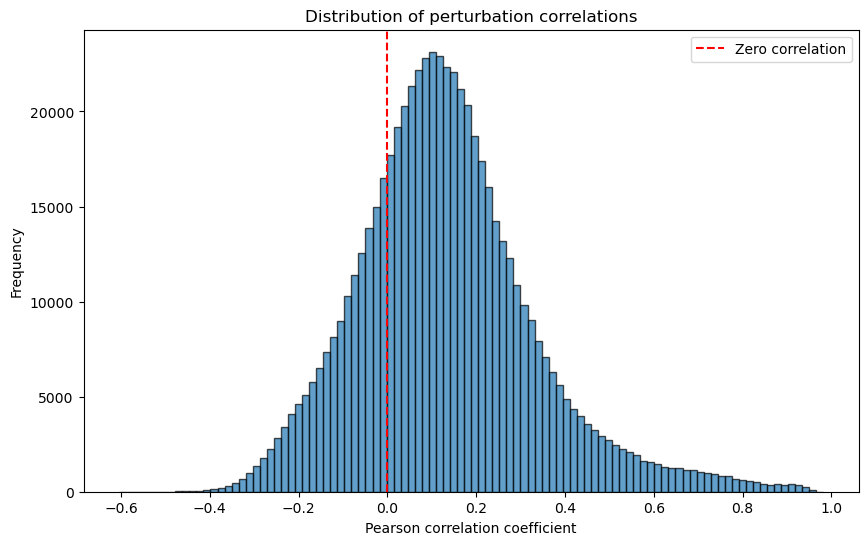

In [49]:
print("=== 进行相关性分析和聚类 ===")

# 创建特征矩阵
feature_matrix = strong_adata[:, feature_genes.index].copy()

print(f"特征矩阵形状: {feature_matrix.X.shape}")

# 重要：将每个扰动中目标基因的表达设为0（论文方法）
print("将目标基因表达设为0...")
for i, idx in enumerate(strong_adata.obs.index):
    target_gene = strong_adata.obs.loc[idx, 'gene_target']
    if target_gene in feature_genes.index:
        try:
            target_idx = feature_genes.index.get_loc(target_gene)
            feature_matrix.X[i, target_idx] = 0  # 设为0
        except KeyError:
            pass  # 基因名可能在feature_genes中有不同格式

# 创建扰动的表达谱DataFrame
perturbation_profiles = pd.DataFrame(
    feature_matrix.X,
    index=strong_adata.obs['gene_target'],
    columns=feature_genes.index
)

print(f"扰动表达谱形状: {perturbation_profiles.shape}")

# 计算Pearson相关系数矩阵
print("计算相关性矩阵...")
correlation_matrix = perturbation_profiles.T.corr(method='pearson')

print(f"相关性矩阵形状: {correlation_matrix.shape}")

# 分析相关性分布
corr_values = correlation_matrix.values[np.triu_indices_from(correlation_matrix, k=1)]
print(f"相关性统计:")
print(f"  平均值: {corr_values.mean():.3f}")
print(f"  中位数: {np.median(corr_values):.3f}")
print(f"  最小值: {corr_values.min():.3f}")
print(f"  最大值: {corr_values.max():.3f}")

# 可视化相关性分布
plt.figure(figsize=(10, 6))
plt.hist(corr_values, bins=100, edgecolor='black', alpha=0.7)
plt.xlabel('Pearson correlation coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of perturbation correlations')
plt.axvline(x=0, color='red', linestyle='--', label='Zero correlation')
plt.legend()
plt.show()

In [50]:
feature_matrix

AnnData object with n_obs × n_vars = 1099 × 2563
    obs: 'UMI_count_unfiltered', 'num_cells_unfiltered', 'num_cells_filtered', 'control_expr', 'fold_expr', 'pct_expr', 'core_control', 'mean_leverage_score', 'std_leverage_score', 'energy_test_p_value', 'anderson_darling_counts', 'mann_whitney_counts', 'z_gemgroup_UMI', 'mitopercent', 'TE_ratio', 'cnv_score_z', 'gene_target', 'knockdown_efficiency'
    var: 'gene_name', 'mean', 'std', 'cv', 'in_matrix', 'gini', 'clean_mean', 'clean_std', 'clean_cv'

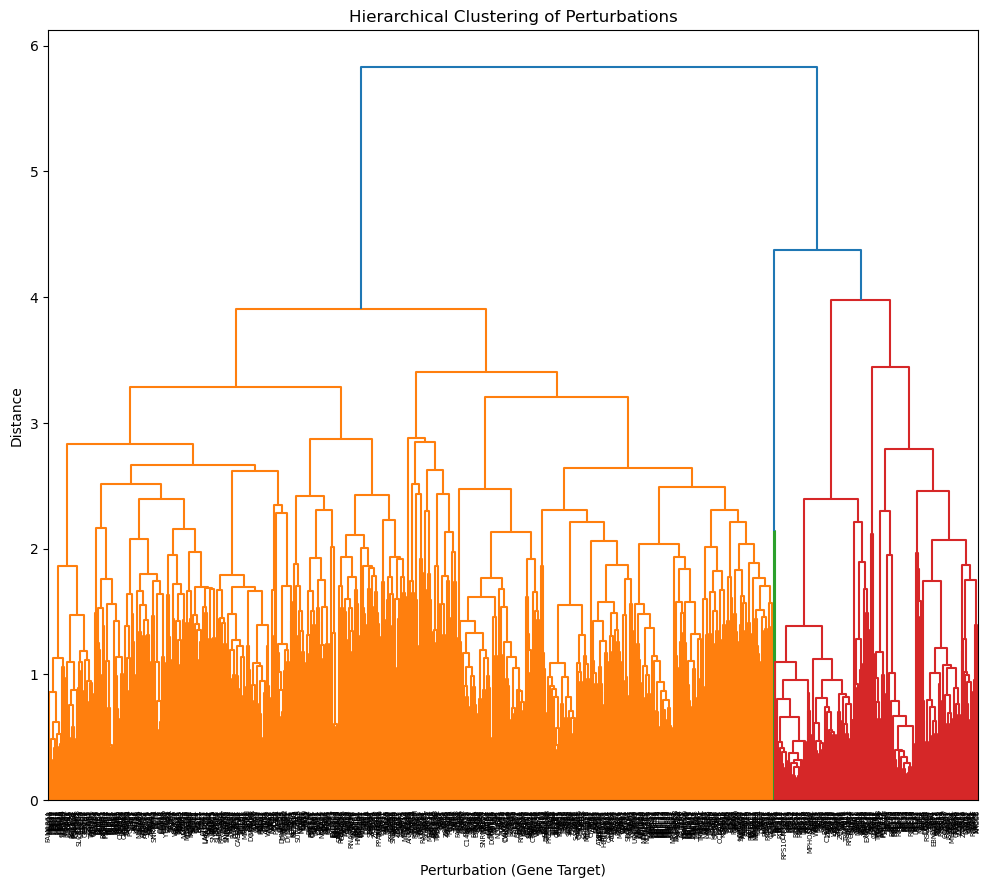

In [53]:
#聚类
import scipy.cluster.hierarchy as sch
# 计算距离矩阵
distance_matrix = 1 - correlation_matrix / 2  # 将相关性转换为距离
# 进行层次聚类
linkage_matrix = sch.linkage(distance_matrix, method='average')
# 绘制树状图
plt.figure(figsize=(12, 10))
sch.dendrogram(linkage_matrix, labels=correlation_matrix.index, leaf_rotation=90)
plt.title('Hierarchical Clustering of Perturbations')
plt.xlabel('Perturbation (Gene Target)')
plt.ylabel('Distance')
plt.show()
#聚类后调整feature_matrix顺序
clustered_indices = sch.fcluster(linkage_matrix, t=10, criterion='maxclust')
# 根据聚类结果重新排序
sorted_order = np.argsort(clustered_indices)
feature_matrix = feature_matrix[sorted_order, :]

In [ ]:
#高边基因聚类
import scipy.cluster.hierarchy as sch
# 计算距离矩阵
distance_matrix = 1 - correlation_matrix / 2  # 将相关性转换为距离
# 进行层次聚类


Text(0.5, 1.0, 'Perturbation Feature Matrix')

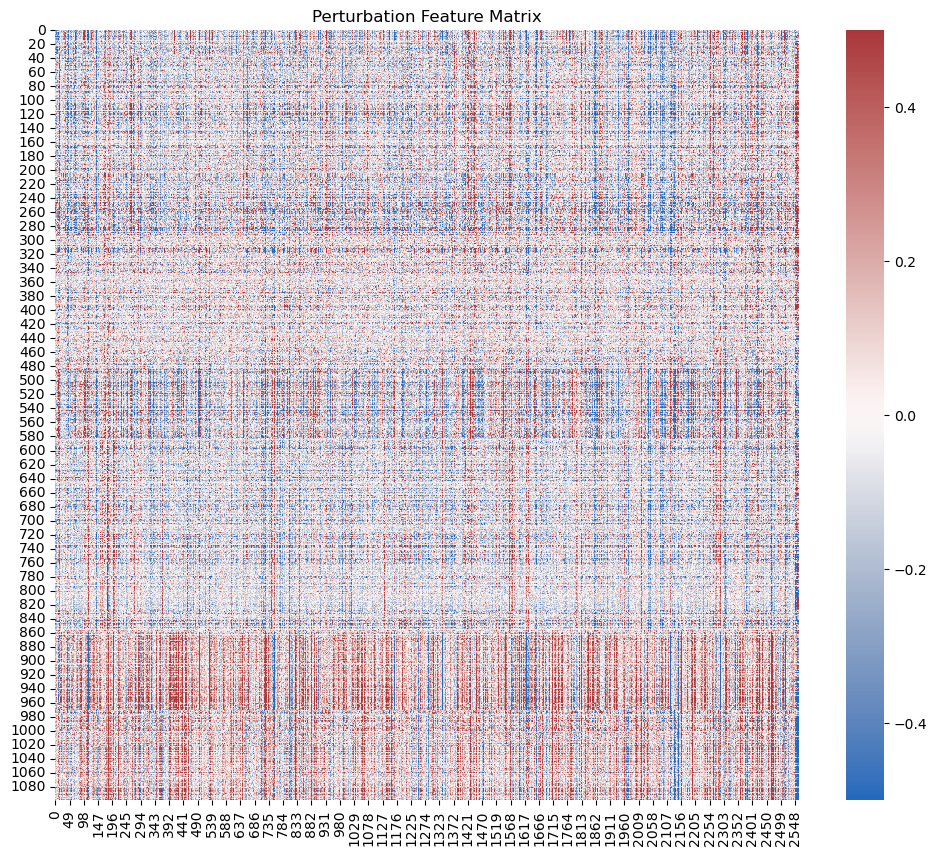

In [54]:
#可视化聚类后的特征矩阵
plt.figure(figsize=(12, 10))    
sns.heatmap(feature_matrix.X, cmap='vlag', vmin=-0.5, vmax=0.5, center=0)
plt.title('Perturbation Feature Matrix')

Text(0.5, 1.0, 'Perturbation Correlation Matrix')

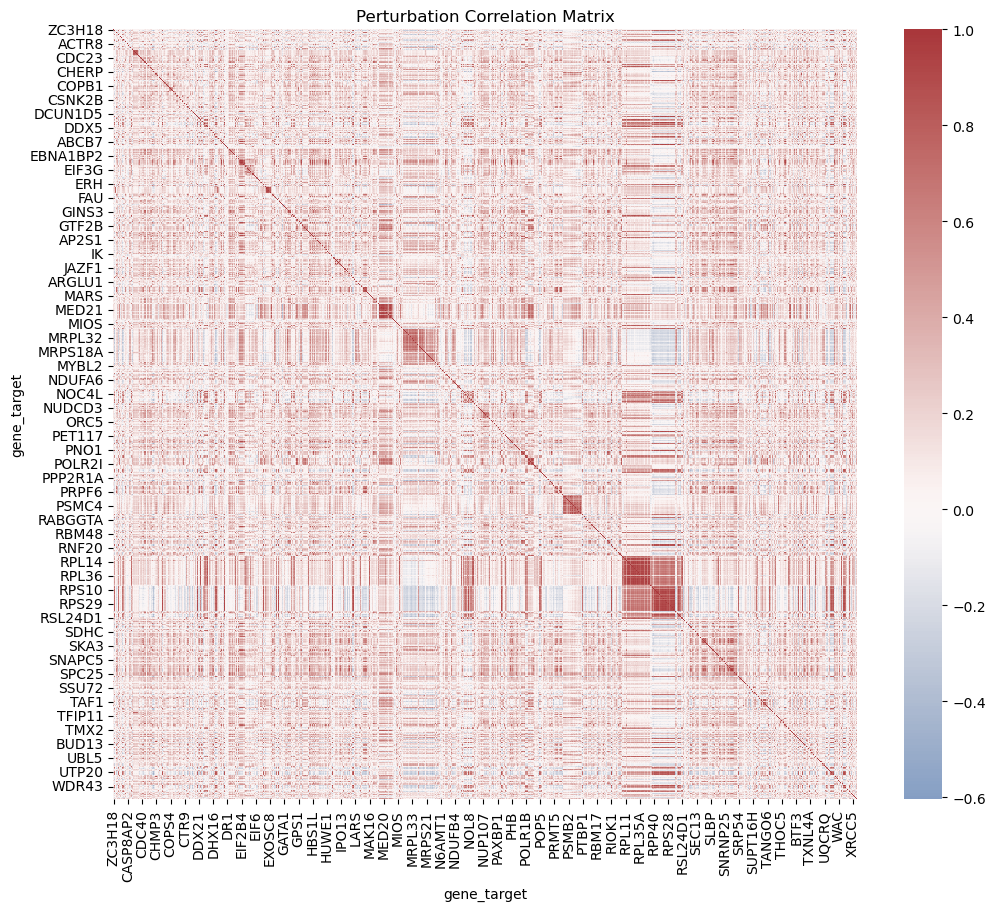

In [42]:
#可视化相关性矩阵
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='vlag', center=0)
plt.title('Perturbation Correlation Matrix')

In [ ]:
import sklearn, sys, os
print("sklearn:", sklearn.__version__, "from", sklearn.__file__)
print("Python:", sys.executable)

sklearn: 1.6.1 from d:\Anaconda\envs\scRNA_new\lib\site-packages\sklearn\__init__.py
Python: d:\Anaconda\envs\scRNA_new\python.exe
